In [ ]:
import pandas as pd
import numpy as np
import os
import sys
import pickle
import random
import time
from decimal import Decimal
sys.path.insert(0,'/media/sf_work/monitoring_analysis/projects/LHC_intensity_calculations')
from statsmodels.nonparametric.smoothers_lowess import lowess


from config import DATA_DIRs_NAMES
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.facecolor'] = 'w'

In [2]:
DATA_DIRs_NAMES

{'blm_data': '/media/sf_work/monitoring_analysis/data/blm_data',
 'blm_lists': '/media/sf_work/monitoring_analysis/data/blm_lists',
 'date_lists': '/media/sf_work/monitoring_analysis/data/date_lists',
 'intensity_data': '/media/sf_work/monitoring_analysis/data/intensity_data',
 'old_analysis': '/media/sf_work/monitoring_analysis/data/old_analysis',
 'pickles': '/media/sf_work/monitoring_analysis/data/pickles'}

# Importing intensity and interval information

In [3]:
path_intensity_intervals = os.path.join(DATA_DIRs_NAMES['pickles'],'intensity_intervals')
for p,d,f in os.walk(path_intensity_intervals):
    files = f
    break
int_2016 = files[3]
print(int_2016)

intensity_intervals_20160404000000_20161205000000.p


In [4]:
with open(os.path.join(path_intensity_intervals,int_2016),'rb') as f:
    ii_2016 = pickle.load(f)

In [5]:
ii_2016[1].start

1459732033.8699999

# Importing old analysis results for finding blm names

In [6]:
path_old_blm_analysis = DATA_DIRs_NAMES['old_analysis']
for p,d,f in os.walk(path_old_blm_analysis):
    files = f
    break

blm_analysis_2016_nn_old_file = files[0]
print(blm_analysis_2016_nn_old_file)

blm_data_2016_nn_new.csv


In [7]:
df_blm_analysis_2016_nn_old = pd.read_csv(os.path.join(path_old_blm_analysis,blm_analysis_2016_nn_old_file),index_col = 0)

In [8]:
df_blm_analysis_2016_nn_old.columns[:]

Index(['2016-04-04', '2016-04-11', '2016-04-18', '2016-04-25', '2016-05-02',
       '2016-05-09', '2016-05-16', '2016-05-23', '2016-05-30', '2016-06-06',
       '2016-06-13', '2016-06-20', '2016-06-27', '2016-07-04', '2016-07-11',
       '2016-07-18', '2016-07-25', '2016-08-01', '2016-08-08', '2016-08-15',
       '2016-08-22', '2016-08-29', '2016-09-05', '2016-09-12', '2016-09-19',
       '2016-09-26', '2016-10-03', '2016-10-10', '2016-10-17', '2016-10-24',
       '2016-10-31', '2016-11-07', '2016-11-14', '2016-11-21', '2016-11-28',
       'dcum', 'TOTAL'],
      dtype='object')

## Sorting the data and take 5 random blms from the first 100 blms with the lowest dose

In [9]:
df_blm_sorted = df_blm_analysis_2016_nn_old[['TOTAL','dcum']].sort_values(by = 'TOTAL')

In [10]:
random_sample = random.sample(range(1,100),5)
random_sample  = [53, 12, 48, 98, 65]

In [11]:
blms_low = df_blm_sorted.iloc[random_sample].index
print(blms_low)

Index(['BLMQI.16L8.B1E30_MQ', 'BLMEI.04R6.B2I10_MSDA.C4R6.B2',
       'BLMQI.19L1.B2E30_MQ', 'BLMQI.13R8.B2E30_MQ', 'BLMQI.32R2.B2E30_MQ'],
      dtype='object')


## BLMs with low signal

In [13]:
df_blm_analysis_2016_nn_old.loc[blms_low]

,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02,2016-05-09,2016-05-16,2016-05-23,2016-05-30,2016-06-06,...,2016-10-10,2016-10-17,2016-10-24,2016-10-31,2016-11-07,2016-11-14,2016-11-21,2016-11-28,dcum,TOTAL
BLMQI.16L8.B1E30_MQ,0.026731,0.019791,0.025815,0.012048,0.012391,0.024072,0.022670,0.008953,0.033235,0.015275,...,0.003876,0.003430,0.004354,0.000341,0.001188,0.001291,0.001122,0.000989,22627.21,0.392143
BLMEI.04R6.B2I10_MSDA.C4R6.B2,0.022963,0.018023,0.021363,0.008732,0.008503,0.035078,0.012669,0.007565,0.036752,0.013697,...,-0.001284,0.001488,0.004066,0.000110,0.000201,0.000854,0.000386,-0.000095,16687.66,0.319852
BLMQI.19L1.B2E30_MQ,0.027957,0.020869,0.027087,0.012420,0.011729,0.023472,0.021829,0.008836,0.033331,0.017081,...,0.001944,0.001730,0.003237,0.000740,0.000652,0.001972,0.000826,0.000762,25789.79,0.388920
BLMQI.13R8.B2E30_MQ,0.024049,0.017689,0.024724,0.011426,0.013510,0.026862,0.024847,0.010143,0.037268,0.019278,...,0.001814,0.001474,0.003469,0.000725,0.000824,0.000361,0.000850,0.000691,23865.59,0.425125
BLMQI.32R2.B2E30_MQ,0.027145,0.020133,0.025741,0.012046,0.011669,0.022204,0.021175,0.008458,0.032624,0.017123,...,0.001590,0.001831,0.003057,0.000652,0.000925,0.000314,0.000897,0.000828,4886.98,0.405163


## BLMs with high signal

In [14]:
blms_hi = df_blm_sorted.index[-2:]
df_blm_analysis_2016_nn_old.loc[blms_hi]

,2016-04-04,2016-04-11,2016-04-18,2016-04-25,2016-05-02,2016-05-09,2016-05-16,2016-05-23,2016-05-30,2016-06-06,...,2016-10-10,2016-10-17,2016-10-24,2016-10-31,2016-11-07,2016-11-14,2016-11-21,2016-11-28,dcum,TOTAL
BLMTI.04R5.B1E10_TANC.4R5,0.174224,0.279453,2.428426,12.391617,70.033402,686.173711,854.777038,370.064097,3875.574530,1347.262454,...,3524.661499,4143.542825,2433.633096,0.002194,0.004854,1.319350,17.922558,99.028273,13468.84,67752.735328
BLMTI.04L5.B2E10_TANC.4L5,0.293381,0.491419,4.366415,21.591237,120.788811,1183.674924,1473.214164,637.310176,6658.637136,2315.654925,...,5941.985522,6963.810374,4084.265638,0.002829,0.132669,70.957905,57.141198,7.219595,13190.00,115453.570859


# Importing BLM data

In [15]:
for p,d,f in os.walk(DATA_DIRs_NAMES['blm_data']):
    dirs = d
    break

In [16]:
blms = blms_low.tolist() + blms_hi.tolist()

In [17]:
blms

['BLMQI.16L8.B1E30_MQ',
 'BLMEI.04R6.B2I10_MSDA.C4R6.B2',
 'BLMQI.19L1.B2E30_MQ',
 'BLMQI.13R8.B2E30_MQ',
 'BLMQI.32R2.B2E30_MQ',
 'BLMTI.04R5.B1E10_TANC.4R5',
 'BLMTI.04L5.B2E10_TANC.4L5']

In [18]:
filt_list = list(blm.replace('.','_') for blm in blms)

In [19]:
filt_list

['BLMQI_16L8_B1E30_MQ',
 'BLMEI_04R6_B2I10_MSDA_C4R6_B2',
 'BLMQI_19L1_B2E30_MQ',
 'BLMQI_13R8_B2E30_MQ',
 'BLMQI_32R2_B2E30_MQ',
 'BLMTI_04R5_B1E10_TANC_4R5',
 'BLMTI_04L5_B2E10_TANC_4L5']

In [20]:
dir_names = [blm for blm in dirs if blm in filt_list]

In [21]:
dir_names

['BLMEI_04R6_B2I10_MSDA_C4R6_B2',
 'BLMQI_13R8_B2E30_MQ',
 'BLMQI_16L8_B1E30_MQ',
 'BLMQI_19L1_B2E30_MQ',
 'BLMQI_32R2_B2E30_MQ',
 'BLMTI_04L5_B2E10_TANC_4L5',
 'BLMTI_04R5_B1E10_TANC_4R5']

In [22]:
def pp(out,ff):
    if ff == 1:
        print(out)

In [23]:
def frame_builder(dic):
    columns = ['data']
    index = list(dic.values())[0][0].tolist()
    data = list(dic.values())[0][1].tolist()
    return pd.DataFrame(data = data,index = index, columns = columns)

In [47]:
class blm_data(object):
    def __init__(self,path,name,filt):
        self.flag_full = 0
        self.flag_print = 0
        self.flag_force_save = 0
        
        self.directory = os.path.join(path,name)
        self.filter = filt
        self.name  = name
        self.df_data = 0
        self.files = 0
    
    def pp(self,out):
        if self.flag_print == 1:
            print(out)
    
    def blm_data_file_lister(self):
        
        for ps,ds,fs in os.walk(self.directory):
            self.files = [f for f in fs if self.filter in f ]
            break

            
            
    def blm_data_loader(self):
        d = []
        for f in self.files:
            self.pp(f)
            with open(os.path.join(self.directory,f),'rb') as ff:
                self.dd = pickle.load(ff,encoding='latin1')
                d.append(frame_builder(self.dd))
                
            self.df_data = pd.concat(d)
#             self.df_data_smothed = smoothy(self.df_data,8)
    
    def integrator(self,data):
        
#         self.loss_interval = self.df_data[(self.df_data.index>=start)&(self.df_data.index<=end)]
        if ~data.empty:
            return np.trapz(y = data['data'],x = data.index),0
        else:
            return 0,1
    
    def offset_calc_pre(self,start,end,offset_sec= 5*60):
        self.offset_interval_pre = self.df_data[(self.df_data.index>=(start-offset_sec))&(self.df_data.index<=start)]
        self.pp(self.offset_interval_pre)
        if ~self.offset_interval_pre.empty:
            offset = np.mean(self.offset_interval_pre['data'])
            if ~np.isnan(offset):
                return offset,0
            else:
                return 0,2
        else:
            return 0,1
    
    def offset_calc_post(self,start,end,offset_sec= 5*60):
        self.offset_interval_post = self.df_data[(self.df_data.index>=(end))&(self.df_data.index<=end+offset_sec)]
        self.pp(self.offset_interval_post)
        if ~self.offset_interval_post.empty:
            offset = np.mean(self.offset_interval_post['data'])
            if ~np.isnan(offset):
                return offset,0
            else:
                return 0,2
        else:
            return 0,1
    
    def offset_corrector(self,integral,offset,dur):
        integral_oc = integral-(offset*dur)
        if integral_oc > 0:
            return integral_oc,0
        if integral_oc <=0:
            return 0,1
    
    

    
    def blm_interval_analysis(self,intervals):
        
        for i in intervals:
#             print(interval.start)
            if self.flag_full == 1:
                i.data_raw  = self.df_data[(self.df_data.index>=i.start)&(self.df_data.index<=i.end)]
                i.integral_raw, i.integral_raw_flag  = self.integrator(i.data_raw)
            else:
                i.integral_raw, i.integral_raw_flag  = self.integrator(self.df_data[(self.df_data.index>=i.start)&(self.df_data.index<=i.end)])
                
            i.offset_pre,   i.offset_pre_flag    = self.offset_calc_pre(i.start,i.end,5*60)
            i.offset_post,  i.offset_post_flag   = self.offset_calc_post(i.start,i.end,5*60)
            
            if self.flag_full == 1:
                i.offset_interval_pre = self.offset_interval_pre
                i.offset_interval_post = self.offset_interval_post
            
            
#             i.integral_oc,  i.integral_oc_flag   = self.offset_corrector(i.integral_raw,i.offset_pre,i.duration)
            if self.flag_full == 1:
                i.data_oc = i.data_raw-i.offset_pre
                i.integral_oc, i.integral_oc_flag  = self.integrator(i.data_oc)
            else:
                i.integral_oc, i.integral_oc_flag  = self.integrator(self.df_data[(self.df_data.index>=i.start)&(self.df_data.index<=i.end)]-i.offset_pre)
            
        self.intervals = intervals  
        
    def pickler(self,file_path):
        if ~os.path.exists(file_path) or self.flag_force_save ==1:
            with open(file_path,'wb') as f:
                pickle.dump(self,f)
        
    

In [48]:
# blm_name =  dir_names[-2]
for blm_name in dir_names:
    start = time.time()
#     direct =  os.path.join(DATA_DIRs_NAMES['blm_data'],blm_name)

    b = blm_data(DATA_DIRs_NAMES['blm_data'],blm_name,'2016')
    b.flag_full = 1
    b.flag_print = 1
    b.flag_force_save = 1
    b.pp(b.name)

    b.blm_data_file_lister()

    b.flag_print = 0
    b.blm_data_loader()

    b.blm_interval_analysis(ii_2016)
    direct_pickle = os.path.join(DATA_DIRs_NAMES['pickles'],'analysed_blm',blm_name+'.p')

    b.pickler(direct_pickle)
    end = time.time()

    print(end-start)

# for i in range(10):
#     print('Duration %2.f' %b.intervals[i].duration)
#     print('Offset_pre %2.5f' %b.intervals[i].offset_pre)
#     print('Offset_post %2.5f' %b.intervals[i].offset_post)
#     print('Integral_raw %2.5f' %b.intervals[i].integral_raw)
#     print('Integral_oc %2.5f' %b.intervals[i].integral_oc)
#     print('')

BLMEI_04R6_B2I10_MSDA_C4R6_B2
5.099139451980591
BLMQI_13R8_B2E30_MQ
5.264197111129761
BLMQI_16L8_B1E30_MQ
5.29503607749939
BLMQI_19L1_B2E30_MQ
5.134288311004639
BLMQI_32R2_B2E30_MQ
5.579516410827637
BLMTI_04L5_B2E10_TANC_4L5
5.078810453414917
BLMTI_04R5_B1E10_TANC_4R5
5.250017881393433


In [85]:
def tid_calc(b):
    tid = 0
    tid_oc = 0
    for interval in b.intervals:
        if interval.integral_oc >=0:
            tid_oc += interval.integral_oc
        if interval.integral_raw >=0:    
            tid += interval.integral_raw
    return [b.name,tid,tid_oc]


In [86]:
pickled_blm_data = os.path.join(DATA_DIRs_NAMES['pickles'],'analysed_blm')
for p,d,f in os.walk(pickled_blm_data):
    analysed_blm_files = f
    break

list_blm_analysed_data = []
for fi in analysed_blm_files:
    with open(os.path.join(pickled_blm_data,fi),'rb') as f:
        list_blm_analysed_data.append(pickle.load(f))

In [87]:
arr  =[]
for blm in list_blm_analysed_data:
    arr.append(tid_calc(blm))
arr =np.array(arr)

In [94]:
list(i for i in arr[:,1])

['1.1806459297',
 '2.14266577565',
 '1.97172627117',
 '1.95452411188',
 '1.99234188994',
 '100036.065806',
 '58753.1890483']

In [115]:
df_new_2016 = pd.DataFrame(data = list(i for i in arr[:,2]),index = arr[:,0],columns = ['new'])

In [116]:
df_oliver_2016 = df_blm_analysis_2016_nn_old.loc[blms][['TOTAL']]
df_oliver_2016.index = [i.replace('.','_') for i in df_oliver_2016.index]
df_oliver_2016.columns = ['oliver']
df_oliver_2016

,oliver
BLMQI_16L8_B1E30_MQ,0.392143
BLMEI_04R6_B2I10_MSDA_C4R6_B2,0.319852
BLMQI_19L1_B2E30_MQ,0.388920
BLMQI_13R8_B2E30_MQ,0.425125
BLMQI_32R2_B2E30_MQ,0.405163
BLMTI_04R5_B1E10_TANC_4R5,67752.735328
BLMTI_04L5_B2E10_TANC_4L5,115453.570859


In [137]:
fi = os.path.join(DATA_DIRs_NAMES['old_analysis'],'BLM_samples_2016_corinna.csv')
df_corinna_2016 = pd.read_csv(fi,index_col = 0)
# df_corinna_2016.index = [i.replace('.','_') for i in df_corinna.index]
del df_corinna_2016.index.name
df_corinna_2016.columns = ['dcum','corinna']

In [138]:
df_corinna_2016

,dcum,corinna
BLMQI_19L1_B2E30_MQ,25789.79,0.142162
BLMQI_32R2_B2E30_MQ,4886.98,0.164352
BLMEI_04R6_B2I10_MSDA_C4R6_B2,16687.66,0.110623
BLMQI_13R8_B2E30_MQ,23865.59,0.154637
BLMQI_16L8_B1E30_MQ,22627.21,0.145018
BLMTI_04L5_B2E10_TANC_4L5,13190.00,99921.175260
BLMTI_04R5_B1E10_TANC_4R5,13468.84,58644.295230


In [139]:
pd.concat([df_corinna_2016,df_oliver_2016],axis = 1)

,dcum,corinna,oliver
BLMEI_04R6_B2I10_MSDA_C4R6_B2,16687.66,0.110623,0.319852
BLMQI_13R8_B2E30_MQ,23865.59,0.154637,0.425125
BLMQI_16L8_B1E30_MQ,22627.21,0.145018,0.392143
BLMQI_19L1_B2E30_MQ,25789.79,0.142162,0.388920
BLMQI_32R2_B2E30_MQ,4886.98,0.164352,0.405163
BLMTI_04L5_B2E10_TANC_4L5,13190.00,99921.175260,115453.570859
BLMTI_04R5_B1E10_TANC_4R5,13468.84,58644.295230,67752.735328


In [140]:
pd.concat([df_new_2016,df_oliver_2016,df_corinna_2016],axis = 1)

,new,oliver,dcum,corinna
BLMEI_04R6_B2I10_MSDA_C4R6_B2,0.0506237467685,0.319852,16687.66,0.110623
BLMQI_13R8_B2E30_MQ,0.0523532725916,0.425125,23865.59,0.154637
BLMQI_16L8_B1E30_MQ,0.0560797457968,0.392143,22627.21,0.145018
BLMQI_19L1_B2E30_MQ,0.0483837282551,0.388920,25789.79,0.142162
BLMQI_32R2_B2E30_MQ,0.0657922817403,0.405163,4886.98,0.164352
BLMTI_04L5_B2E10_TANC_4L5,100027.525683,115453.570859,13190.00,99921.175260
BLMTI_04R5_B1E10_TANC_4R5,58746.2769838,67752.735328,13468.84,58644.295230


/home/oliver/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


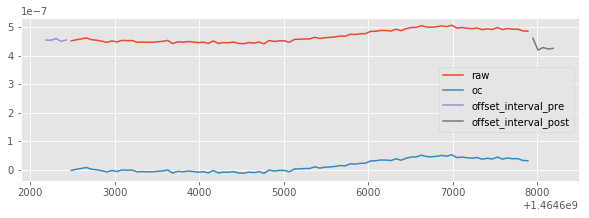

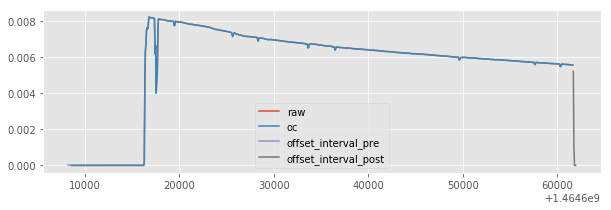

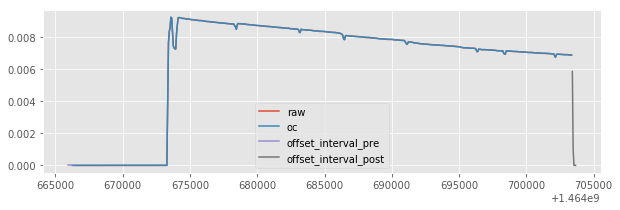

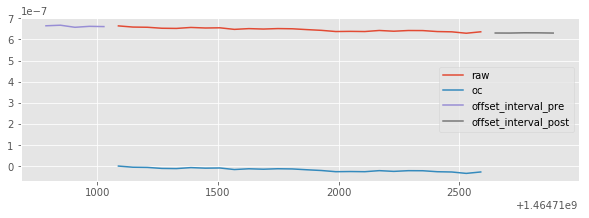

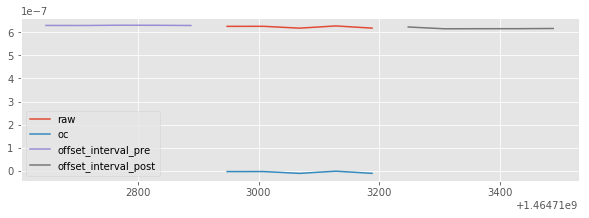

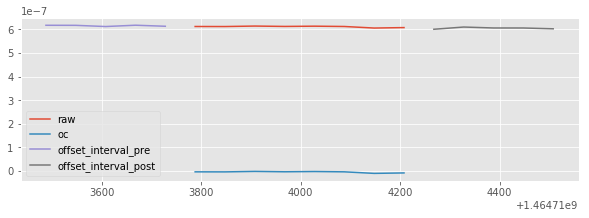

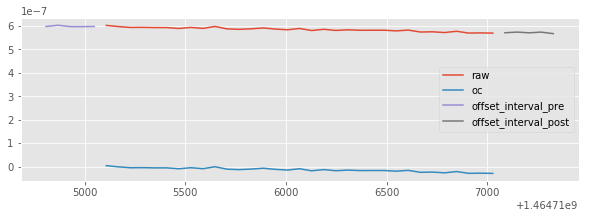

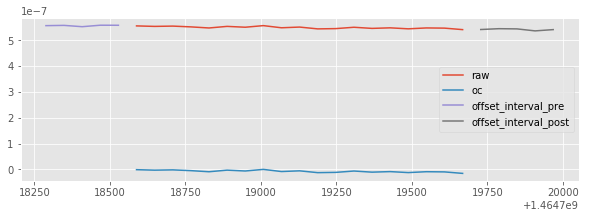

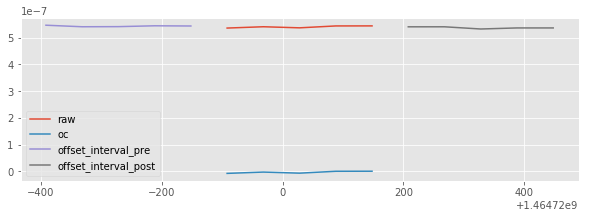

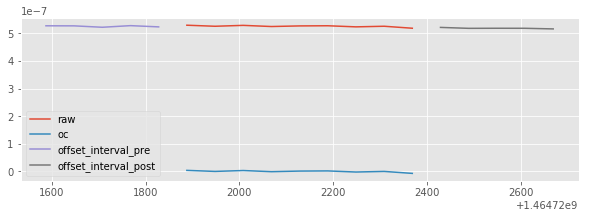

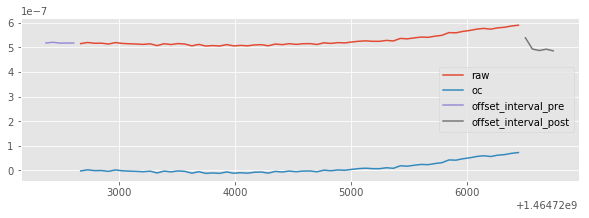

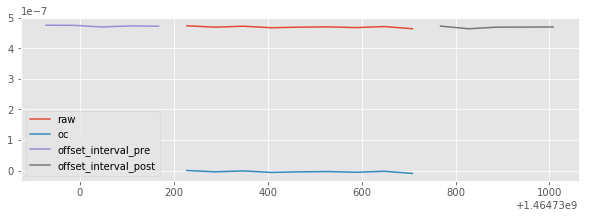

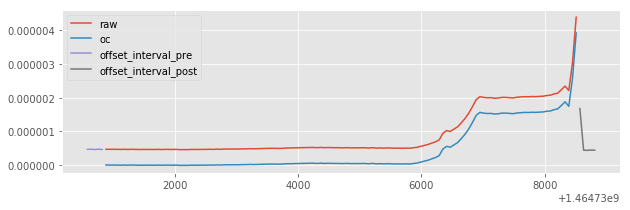

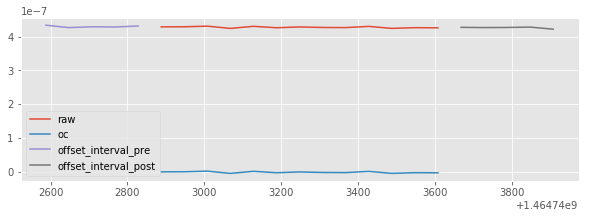

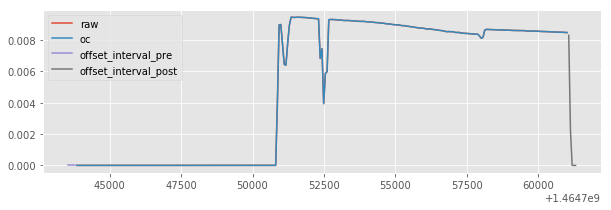

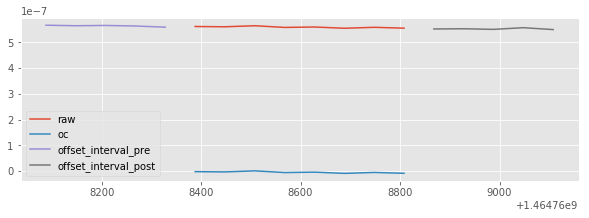

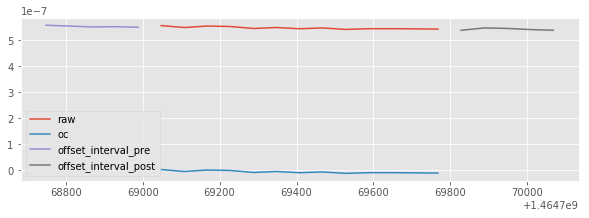

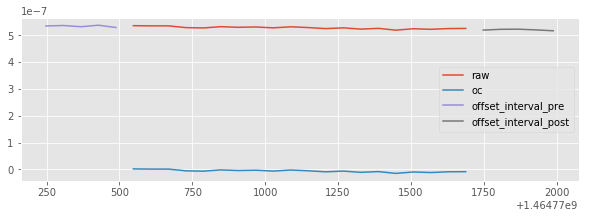

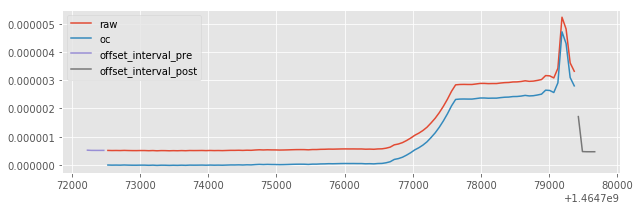

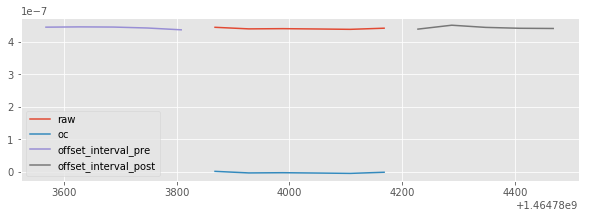

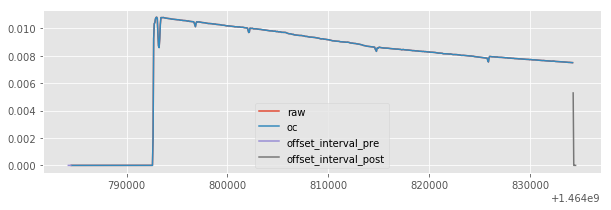

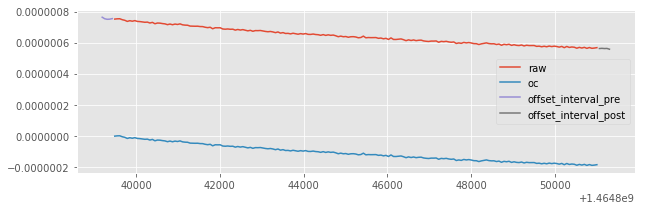

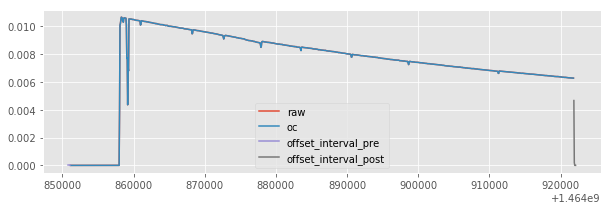

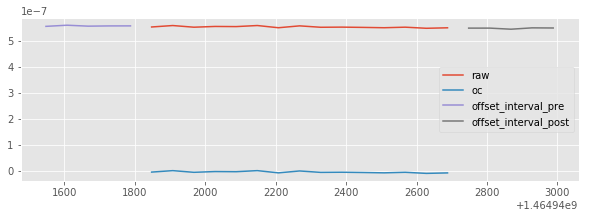

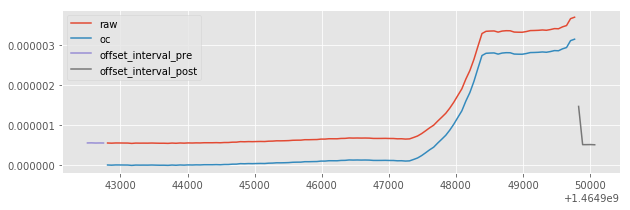

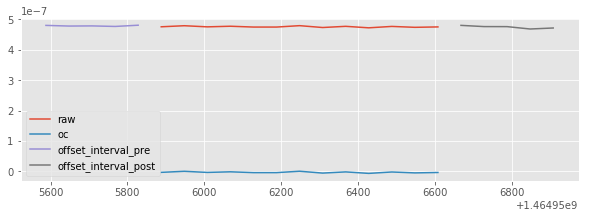

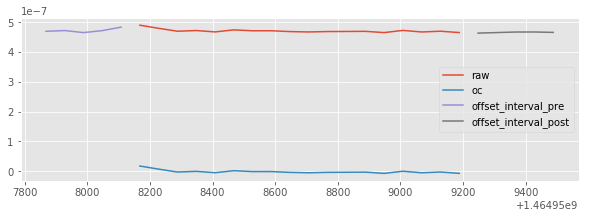

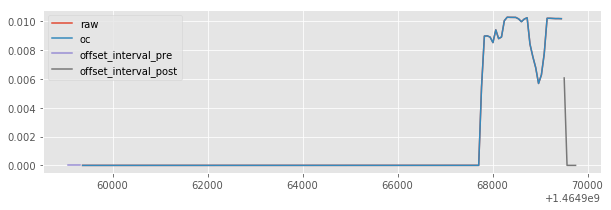

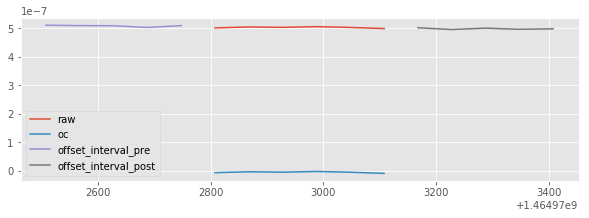

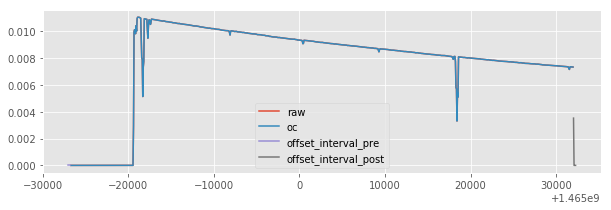

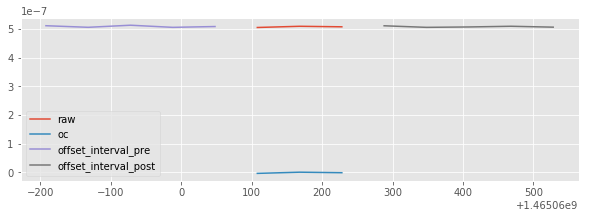

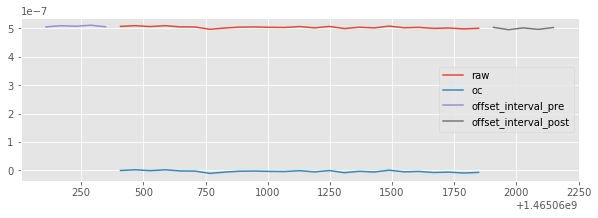

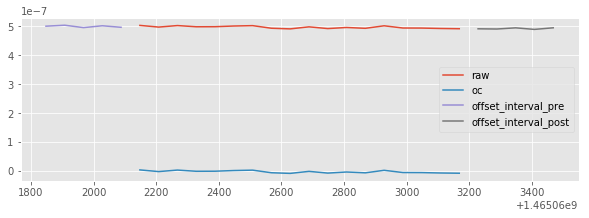

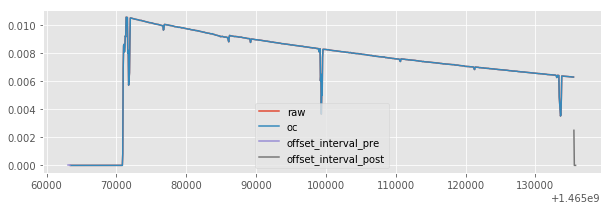

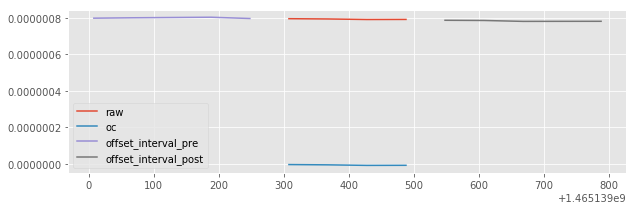

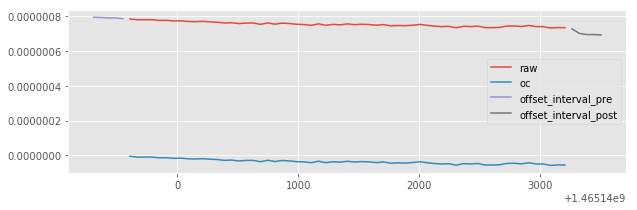

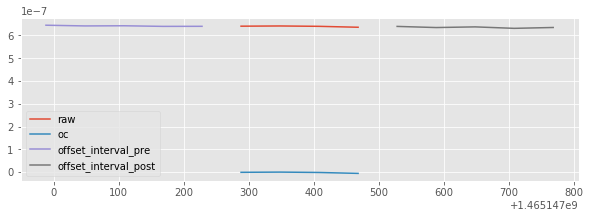

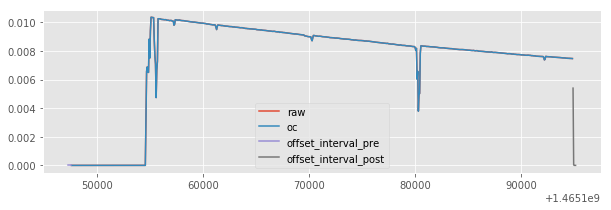

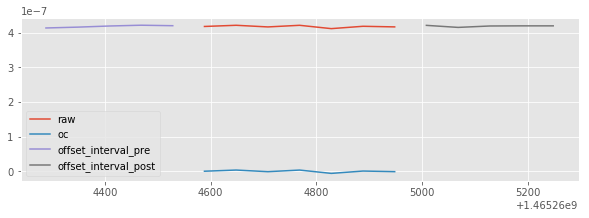

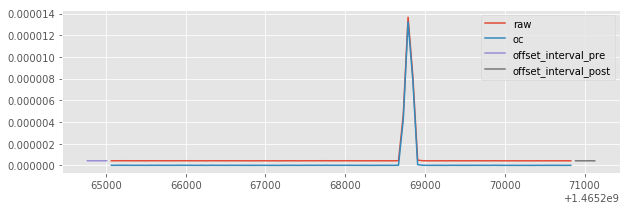

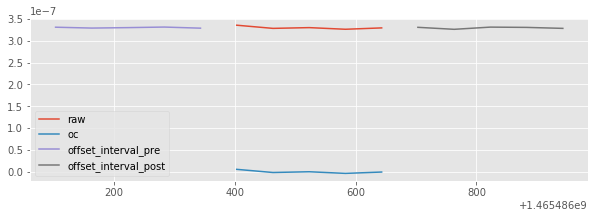

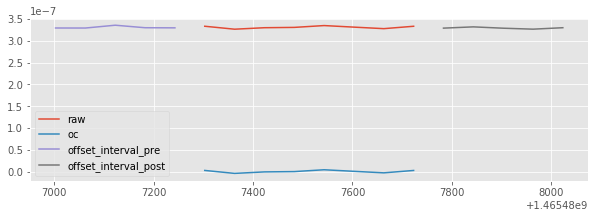

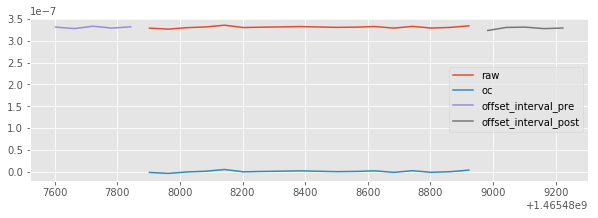

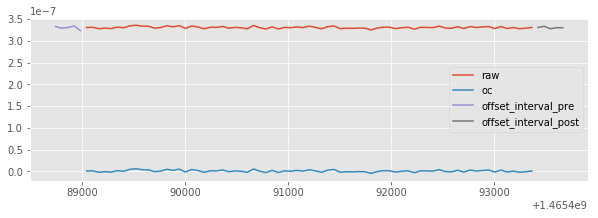

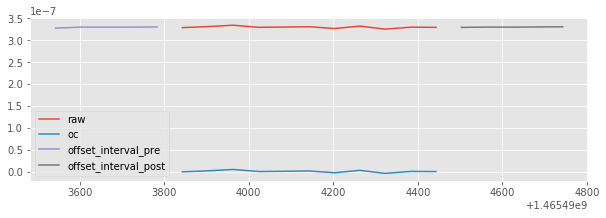

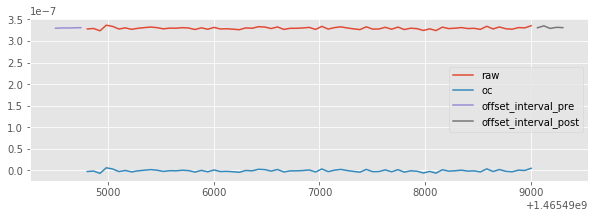

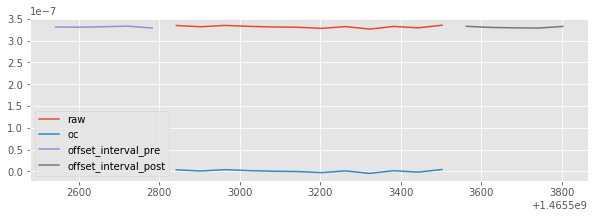

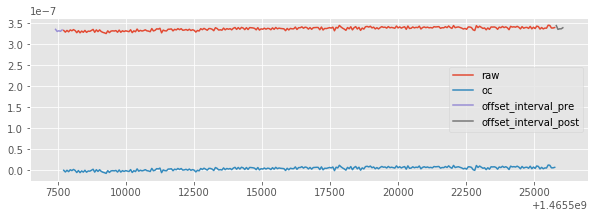

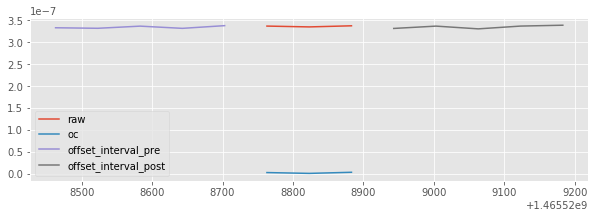

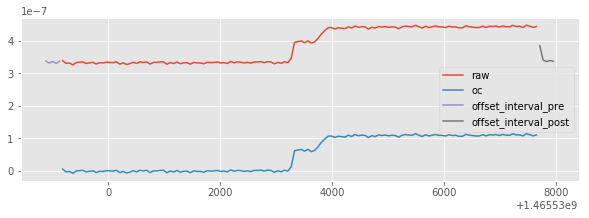

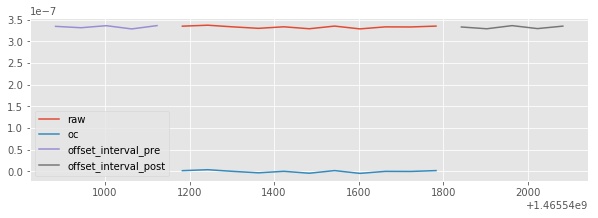

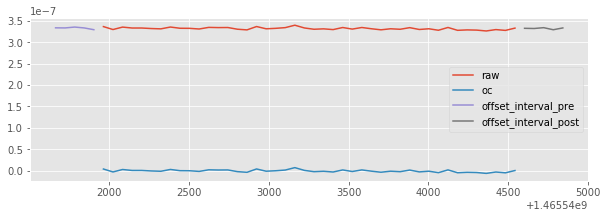

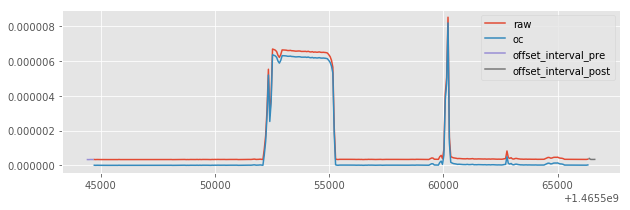

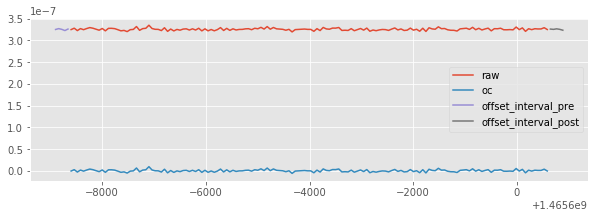

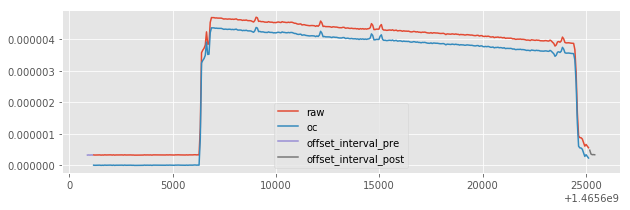

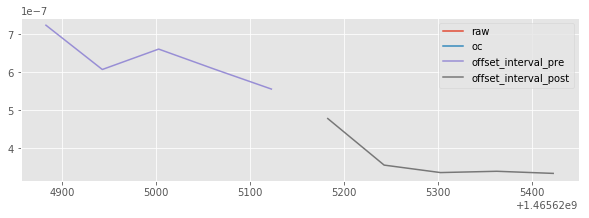

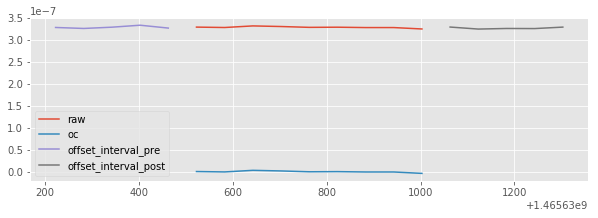

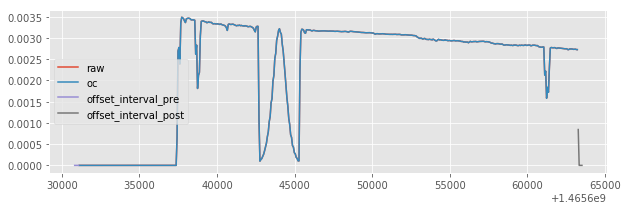

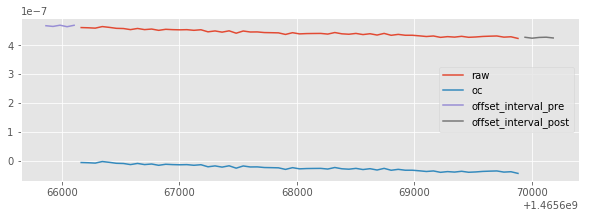

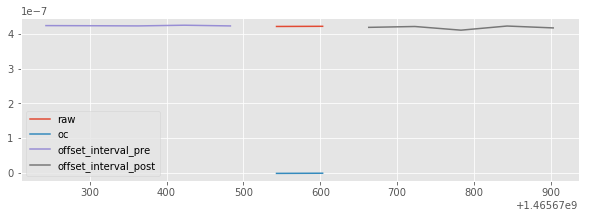

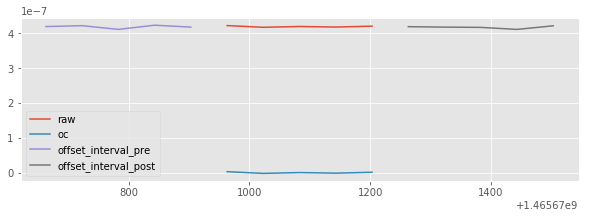

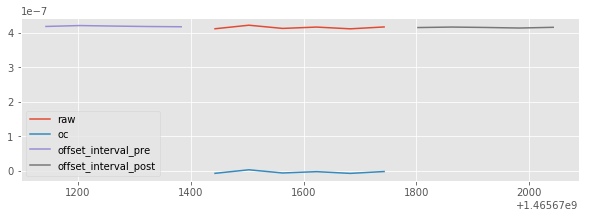

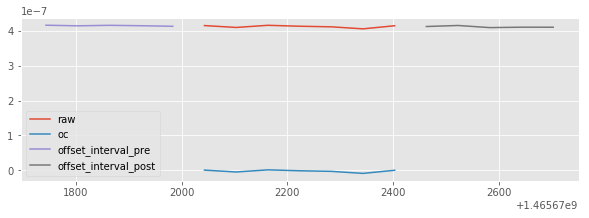

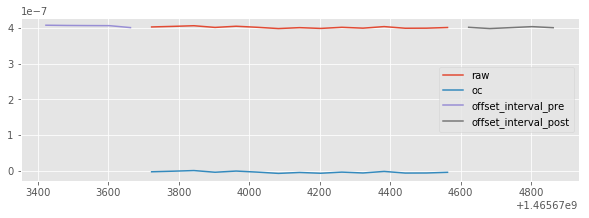

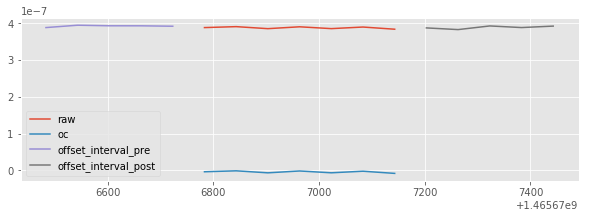

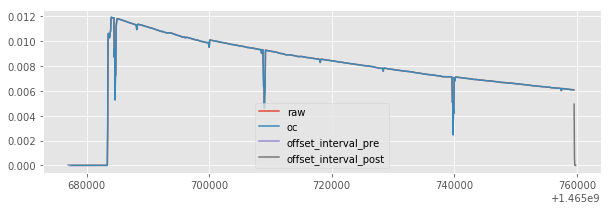

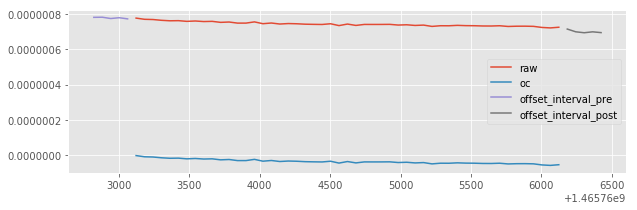

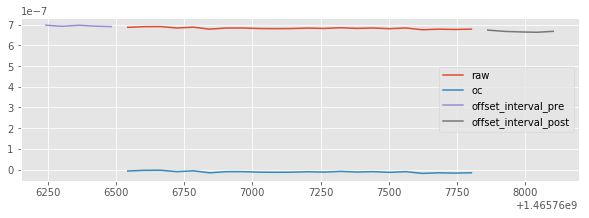

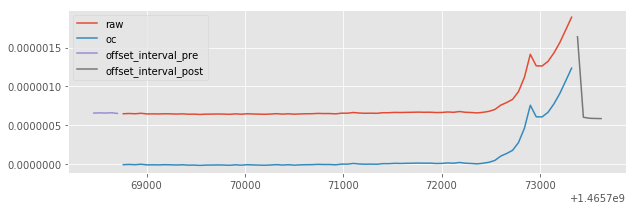

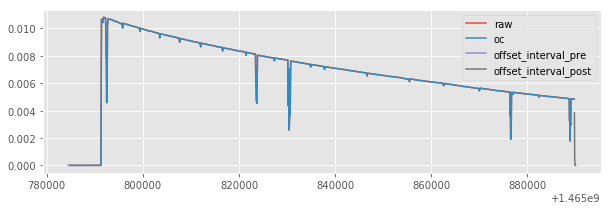

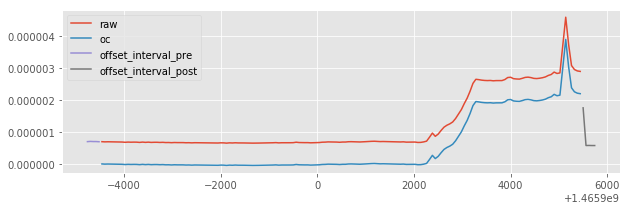

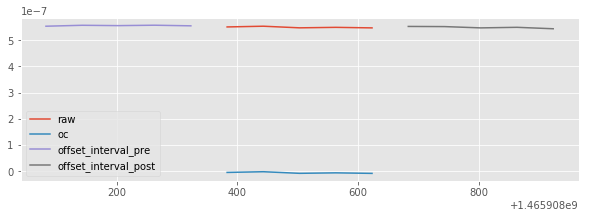

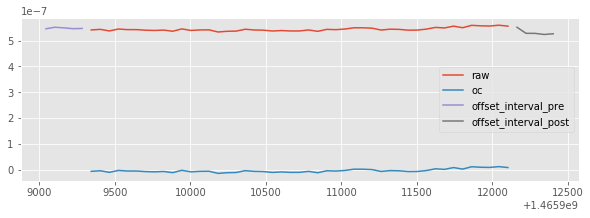

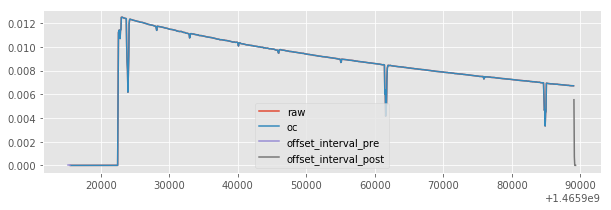

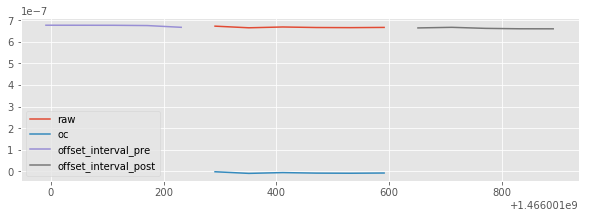

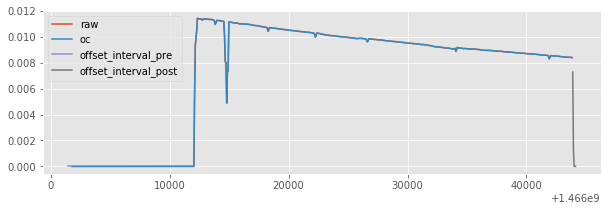

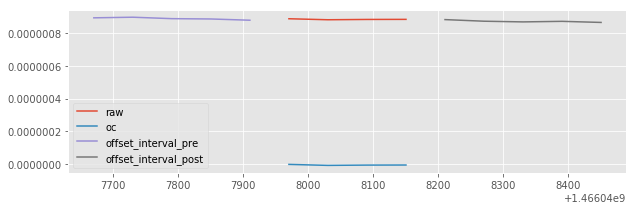

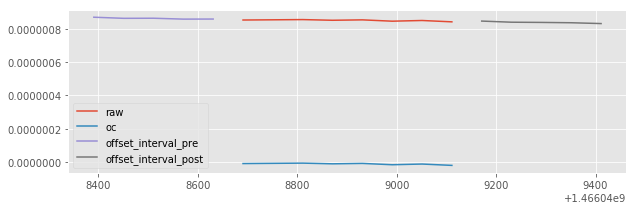

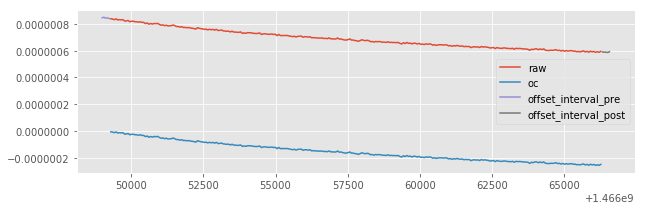

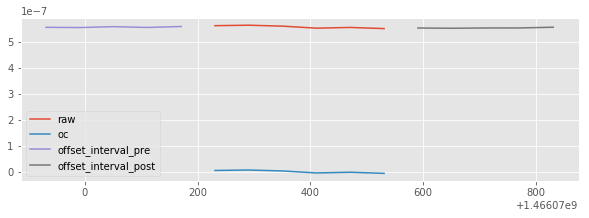

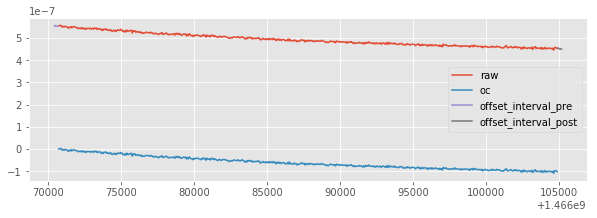

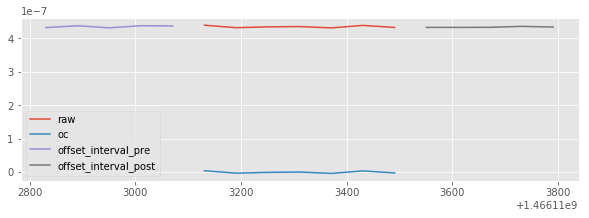

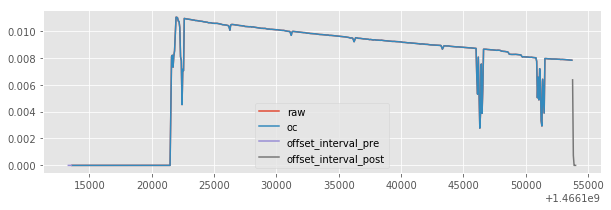

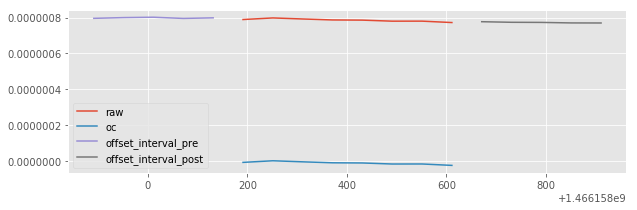

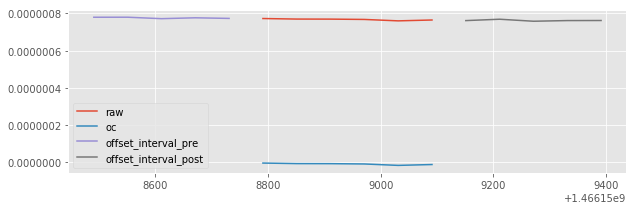

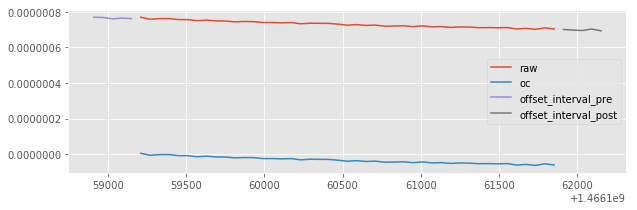

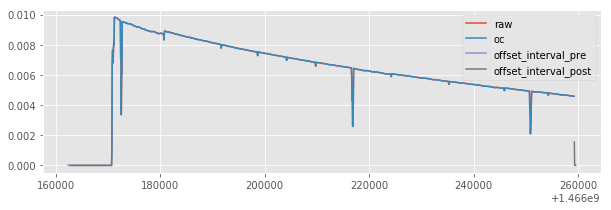

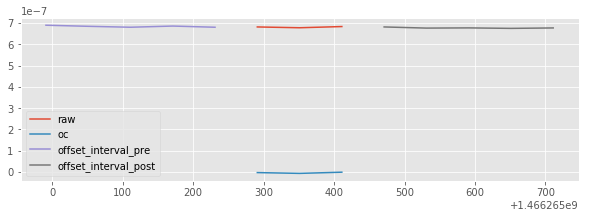

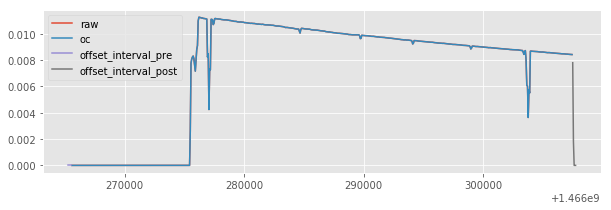

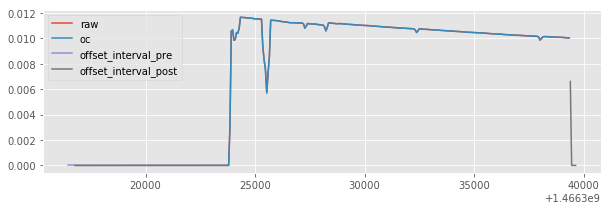

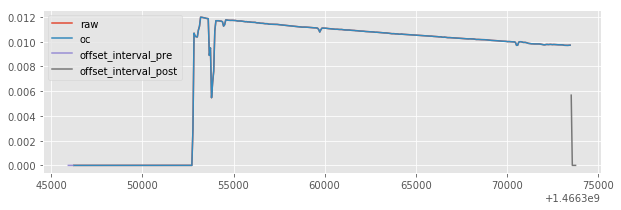

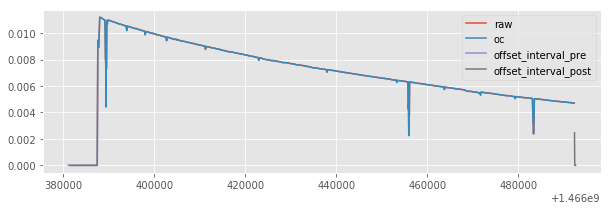

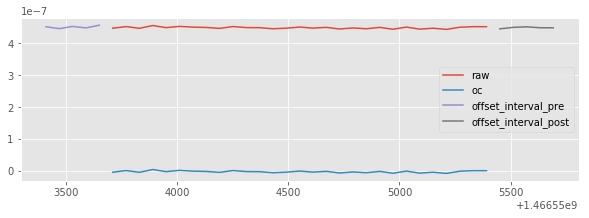

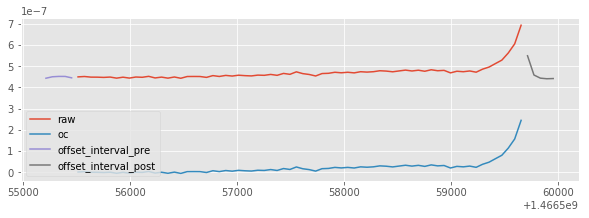

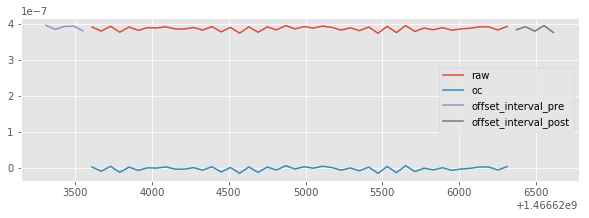

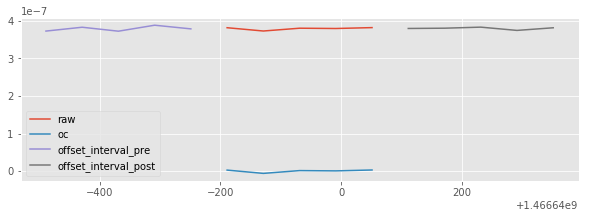

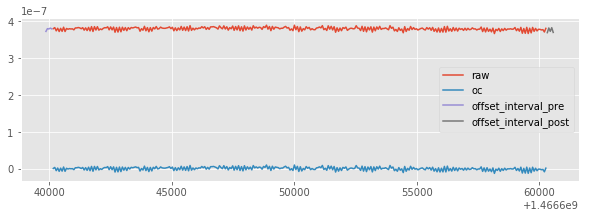

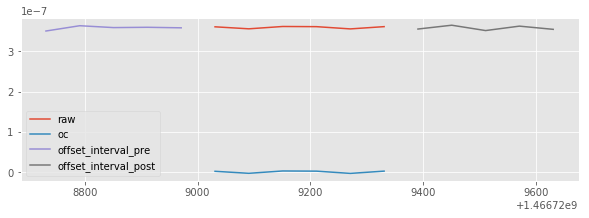

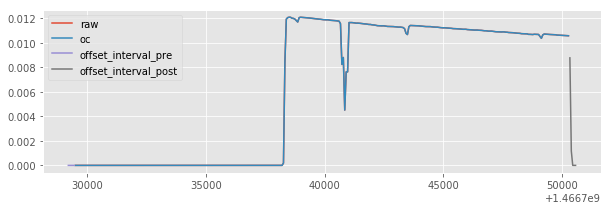

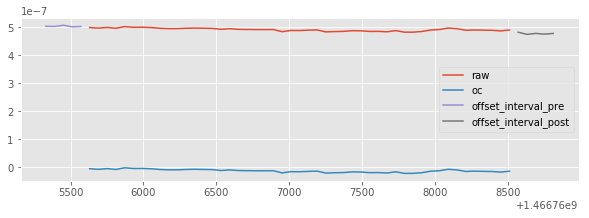

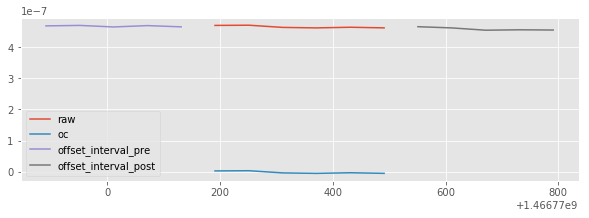

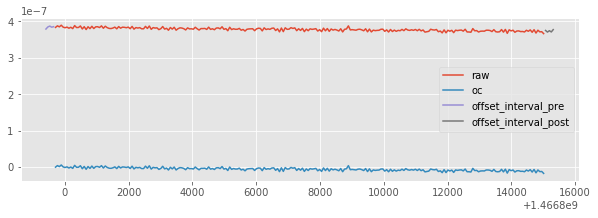

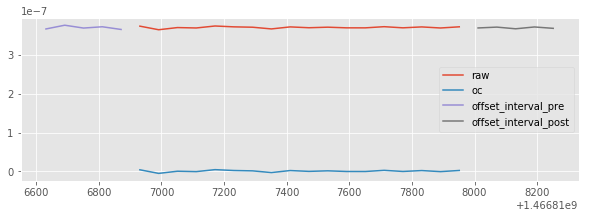

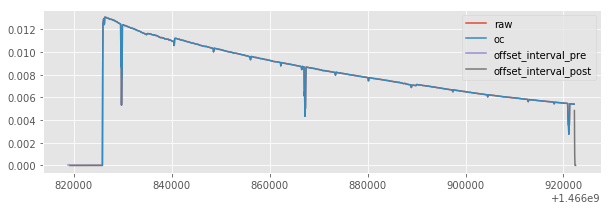

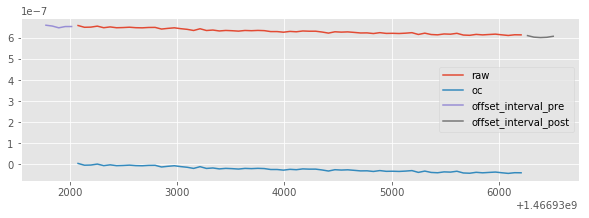

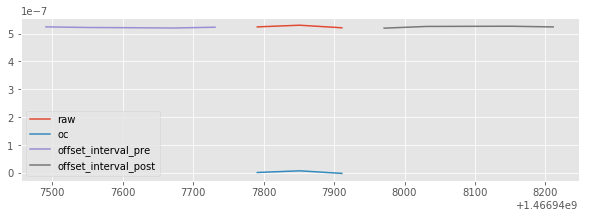

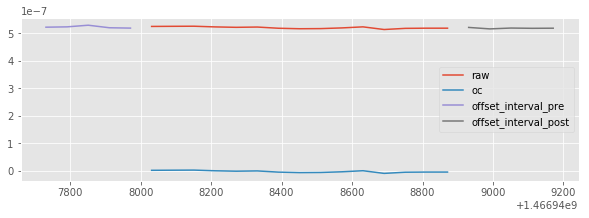

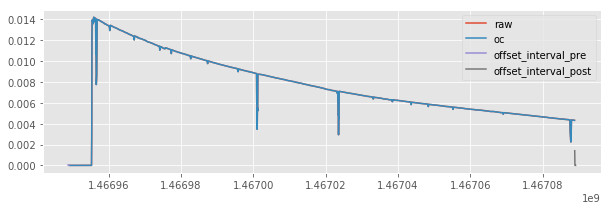

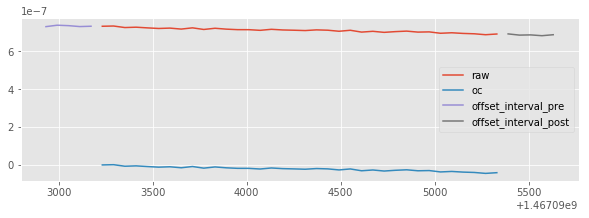

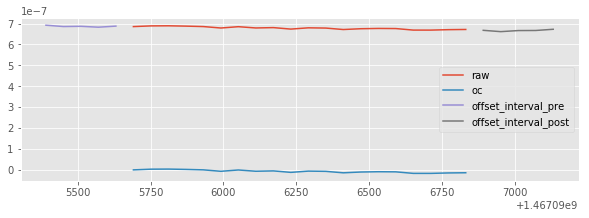

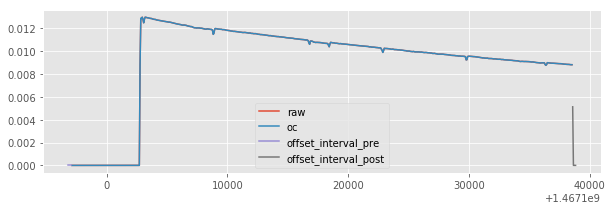

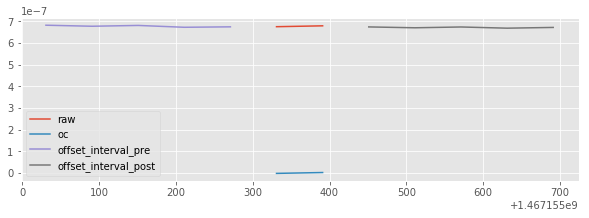

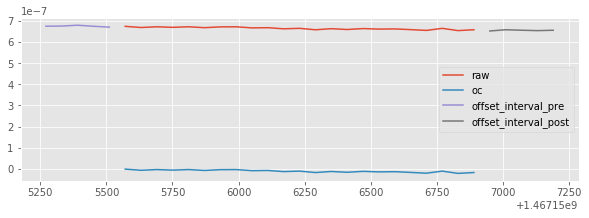

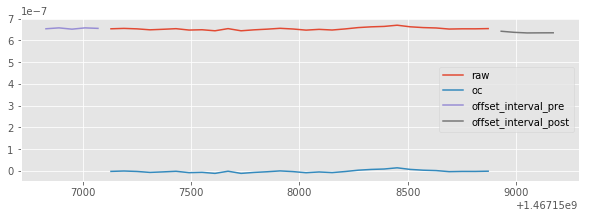

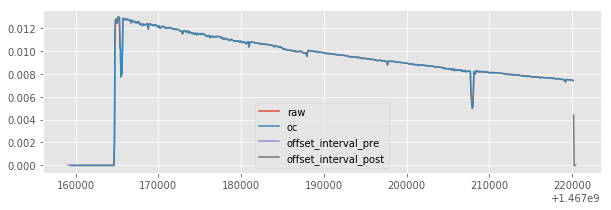

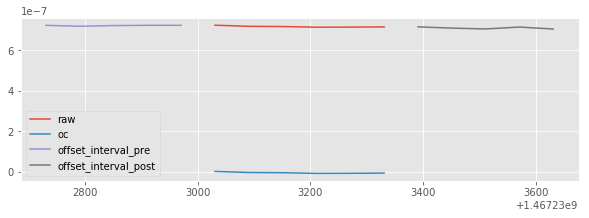

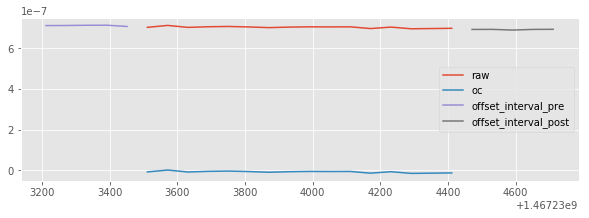

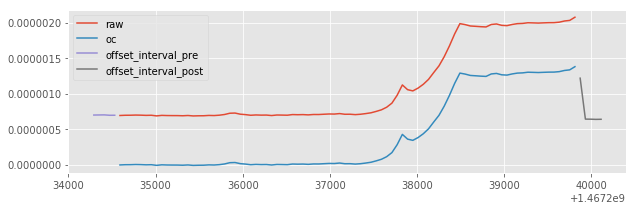

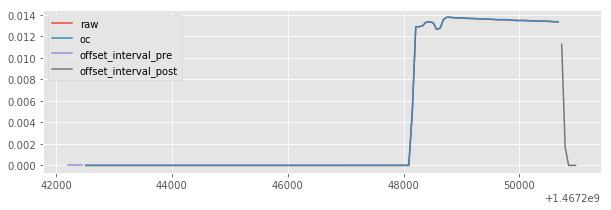

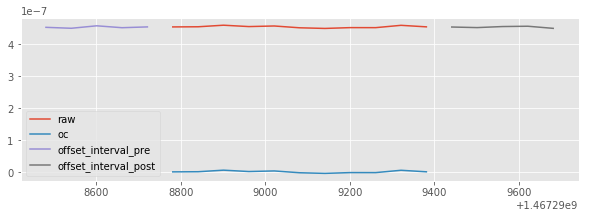

In [56]:
for i in range(400,520):
    fig = plt.figure(figsize=(10,6))
    fig.subplots_adjust(hspace = .001)
    ax = fig.add_subplot(2,1,1)
    ax.plot(b.intervals[i].data_raw,label = 'raw')
    ax.plot(b.intervals[i].data_oc,label = 'oc')
    ax.plot(b.intervals[i].offset_interval_pre,label = 'offset_interval_pre')
    ax.plot(b.intervals[i].offset_interval_post,label = 'offset_interval_post')
    ax.legend()
# ax.plot(b.offset_interval_pre)

In [783]:
def smoothy(data,points = 3):
    y = data['data']
    x = data.index
    data_len = len(x)
    
    dn = lowess(y,x,frac = points/data_len)
    return pd.DataFrame(data = dn[:,1],index = dn[:,0],columns = ['data'])

In [769]:
len(b.loss_interval)
y = b.loss_interval['data']
x = b.loss_interval.index
dn = lowess(y,x,frac = .02)

In [828]:
np.trapz(b.intervals[-1].data_oc['data'],b.intervals[-1].data_oc.index)

0.0012160031939999999

In [793]:
np.trapz(list(dn[:,1]),list(dn[:,0]))

0.017478755313748585

In [792]:
df_dn = smoothy(b.loss_interval,8)

In [826]:
b.intervals[-1].integral_oc

0.0012160031939999999

In [31]:
direct_pickle = os.path.join(DATA_DIRs_NAMES['pickles'],'analysed_blm',blm_name+'.p')
with open(direct_pickle,'rb') as f:
    o = pickle.load(f)

In [640]:
tid

2.142665775650995

In [641]:
tid_oc

0.049555631061107823

In [642]:
df_blm_analysis_2016_nn_old.loc[blms]['TOTAL']

BLMQI.16L8.B1E30_MQ              0.392143
BLMEI.04R6.B2I10_MSDA.C4R6.B2    0.319852
BLMQI.19L1.B2E30_MQ              0.388920
BLMQI.13R8.B2E30_MQ              0.425125
BLMQI.32R2.B2E30_MQ              0.405163
Name: TOTAL, dtype: float64

In [346]:
frame_builder(b.df_data[1])

,BLMQI.13R8.B2E30_MQ:LOSS_RS12
1.460326e+09,1.276490e-07
1.460326e+09,1.299360e-07
1.460326e+09,1.328270e-07
1.460326e+09,1.279510e-07
1.460326e+09,1.276060e-07
1.460326e+09,1.279080e-07
1.460326e+09,1.310150e-07
1.460326e+09,1.280370e-07
1.460326e+09,1.299790e-07
1.460326e+09,1.321370e-07


In [135]:
[f for f in b.files if '2016' in f] 

['BLMQI_13R8_B2E30_MQ_2016_04_04_2016_04_11.p',
 'BLMQI_13R8_B2E30_MQ_2016_04_11_2016_04_18.p',
 'BLMQI_13R8_B2E30_MQ_2016_04_18_2016_04_25.p',
 'BLMQI_13R8_B2E30_MQ_2016_04_25_2016_05_02.p',
 'BLMQI_13R8_B2E30_MQ_2016_05_02_2016_05_09.p',
 'BLMQI_13R8_B2E30_MQ_2016_05_09_2016_05_16.p',
 'BLMQI_13R8_B2E30_MQ_2016_05_16_2016_05_23.p',
 'BLMQI_13R8_B2E30_MQ_2016_05_23_2016_05_30.p',
 'BLMQI_13R8_B2E30_MQ_2016_05_30_2016_06_06.p',
 'BLMQI_13R8_B2E30_MQ_2016_06_06_2016_06_13.p',
 'BLMQI_13R8_B2E30_MQ_2016_06_13_2016_06_20.p',
 'BLMQI_13R8_B2E30_MQ_2016_06_20_2016_06_27.p',
 'BLMQI_13R8_B2E30_MQ_2016_06_27_2016_07_04.p',
 'BLMQI_13R8_B2E30_MQ_2016_07_04_2016_07_11.p',
 'BLMQI_13R8_B2E30_MQ_2016_07_11_2016_07_18.p',
 'BLMQI_13R8_B2E30_MQ_2016_07_18_2016_07_25.p',
 'BLMQI_13R8_B2E30_MQ_2016_07_25_2016_08_01.p',
 'BLMQI_13R8_B2E30_MQ_2016_08_01_2016_08_08.p',
 'BLMQI_13R8_B2E30_MQ_2016_08_08_2016_08_15.p',
 'BLMQI_13R8_B2E30_MQ_2016_08_15_2016_08_22.p',
 'BLMQI_13R8_B2E30_MQ_2016_08_22_2016_08

In [130]:
b.directory

'/media/sf_work/monitoring_analysis/data/blm_data/BLMQI_13R8_B2E30_MQ'

In [131]:
os.path.exists(b.directory)

True